In [1]:
# data analysis and preparing
import pandas as pd
import numpy as np
import random as rnd

# visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

from sklearn import metrics

In [2]:
df = pd.read_csv('output.csv',low_memory=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head(20)

,Unnamed: 0,gender,age,time_in_hospital,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,InsulinDown,InsulinNo,InsulinSteady,InsulinUp,procedures,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Others,AdmissionElective,AdmissionEmergency,AdmissionNewborn,AdmissionTraumaCenter,AdmissionUrgent,DischargeExpired,DischargeHome,DischargeHospital,Dischargeorganization,AdmissionAbnormalInfant,AdmissionEmergency.1,AdmissionHospital,AdmissionNormalIinfant,AdmissionOrganization,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other.1,Respiratory
0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,3,18,0,9,1,1,2,0,0,0,1,59,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,2,2,13,1,6,0,1,0,0,1,0,0,16,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1,3,2,16,0,7,1,1,0,0,0,0,1,45,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,1,4,1,8,0,5,1,1,0,0,0,1,0,51,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,5,1,5,3,16,0,9,0,1,2,0,0,1,0,37,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
6,6,1,6,4,21,0,7,1,1,0,0,0,1,0,71,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
7,7,1,7,5,12,0,8,0,1,2,0,1,0,0,73,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8,8,0,8,13,28,0,8,1,1,0,0,0,1,0,70,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9,9,0,9,12,18,0,8,1,1,0,0,0,1,0,36,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df['AdmissionEmergency.1'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71049 entries, 0 to 71048
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               71049 non-null  int64 
 1   gender                   71049 non-null  object
 2   age                      71049 non-null  int64 
 3   time_in_hospital         71049 non-null  int64 
 4   num_medications          71049 non-null  int64 
 5   number_inpatient         71049 non-null  int64 
 6   number_diagnoses         71049 non-null  int64 
 7   change                   71049 non-null  int64 
 8   diabetesMed              71049 non-null  int64 
 9   readmitted               71049 non-null  int64 
 10  InsulinDown              71049 non-null  int64 
 11  InsulinNo                71049 non-null  int64 
 12  InsulinSteady            71049 non-null  int64 
 13  InsulinUp                71049 non-null  int64 
 14  procedures               71049 non-nul

In [5]:
df = df[~df['gender'].isin(['Unknown/Invalid'])]

In [6]:
for i in df.columns:
    print(df[i].value_counts())

2047      1
64330     1
45891     1
35652     1
39750     1
37703     1
60232     1
58185     1
62283     1
853       1
49997     1
54095     1
11088     1
9041      1
15186     1
13139     1
47938     1
41793     1
43840     1
86847     1
88894     1
82749     1
92984     1
72502     1
66357     1
68404     1
80690     1
74545     1
99109     1
101156    1
17181     1
19228     1
29467     1
2900      1
6998      1
31642     1
50061     1
43904     1
48002     1
45955     1
58249     1
64394     1
62347     1
11152     1
4951      1
9105      1
15250     1
13203     1
2964      1
5015      1
27544     1
88958     1
82813     1
84860     1
95099     1
91001     1
93048     1
70519     1
72566     1
78707     1
76656     1
21343     1
17245     1
19292     1
29531     1
31578     1
25433     1
27480     1
31514     1
25369     1
27416     1
53967     1
33477     1
60104     1
58057     1
62155     1
51916     1
56014     1
10960     1
4887      1
8913      1
15058     1
13011     1
2772

In [6]:
df = df.drop('Unnamed: 0', axis=1)
X = df.drop('readmitted', axis=1)
y = df['readmitted']


In models part, I decided to try different models at first to judge their performance separately. Then pick up some models for ensemble. Use gridsearch CV for parameters.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

For decision tree, I decided to use the following three hyperparameters, max_features, min_samples_leaf and criterion, these are almost most common hypterparameters we met.

For KNN, change number of neighbors, weights(normal weights or weights divided by distance) and p(which means manhaton distance or euclidian distance).

For logistic regression, some parameters are pre-defined, including max-iterations(must be reset to a larger one or it will not converge), multi_class classifier(use ovr because this is not a bi-classification problem) and penalty(regularization). 

In this part, multiple algorithms will be shown and different hyperparameters will be used. Using matploblib to give different curves for the different paramters and different evaluation metrics.

Use standard scaler to scale the data first.

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),index=X.index,columns=X.columns)

Split the trainning, validation and test set with 8:1:1 and 6:2:2 separately. By comparing the performance, I will use k-fold cross validation to measure the performance more precisely.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4)
x_valid1, x_test1, y_valid1, y_test1 = train_test_split(x_test1, y_test1, test_size=0.5)

## 8:1:1 Split 

### KNN

As for KNN algorithm, change the number of neighbors, weights(normal weights or weights divided by distance) and p(which means manhaton distance or euclidian distance) to compare the performance via accuracy, precision and recall in different K. Since this problem is not a binary classification problem, use weighted to measure the average.

In [ ]:
p = [1,2]
w = ['uniform','distance']
KNN_accuracy = {}
KNN_precision = {}
KNN_recall = {}
KNN_f1 = {}
for m in range(len(p)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(w)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for i in range(1,15):
            knn = KNeighborsClassifier(n_neighbors=i,weights=w[j],p=p[m],metric = 'minkowski',n_jobs=-1)
            knn.fit(x_train, y_train)
            pred_i = knn.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[w[j]] = accuracy
        weight_precision[w[j]] = precision
        weight_recall[w[j]] = recall
        weight_f1[w[j]] = f1
    KNN_accuracy[p[m]] = weight_accuracy
    KNN_precision[p[m]] = weight_precision
    KNN_recall[p[m]] = weight_recall
    KNN_f1[p[m]] = weight_f1

In [ ]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in KNN_accuracy.items():
    x = 0
    for i,j in KNN_accuracy[k].items():
        sub = fig.add_subplot(2,2,m*2+x+1)

        sub.plot(range(1,15), KNN_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+i)
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

From above graphs, we can see that in all three graphs, the curve increases less and less when K at interval [10,14].
In this case, choosing K = 12 as the hypterparameter. The differences can be ignored for p = 1 and p = 2 so randomly choose p = 1 (slightly better)
which means manhattan distance. 
The curve for weights = distance is more smooth so use smooth as the measurement of weights.

In [ ]:
p = [1,2]
w = ['uniform','distance']
neighbors = [15,20,30,50,75,100]
KNN1_accuracy = {}
KNN1_precision = {}
KNN1_recall = {}
KNN1_f1 = {}
for m in range(len(p)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(w)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for i in neighbors:
            knn = KNeighborsClassifier(n_neighbors=i,weights=w[j],p=p[m],metric = 'minkowski',n_jobs=-1)
            knn.fit(x_train, y_train)
            pred_i = knn.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[w[j]] = accuracy
        weight_precision[w[j]] = precision
        weight_recall[w[j]] = recall
        weight_f1[w[j]] = f1
    KNN1_accuracy[p[m]] = weight_accuracy
    KNN1_precision[p[m]] = weight_precision
    KNN1_recall[p[m]] = weight_recall
    KNN1_f1[p[m]] = weight_f1

In [ ]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in KNN1_accuracy.items():
    x = 0
    for i,j in KNN1_accuracy[k].items():
        sub = fig.add_subplot(2,2,m*2+x+1)

        sub.plot(neighbors, KNN1_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+i)
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

From the graphs we can see that to increase the K again will increase the performance slightly so still using K = 12.
The accuracy score of different K's changed little after reached 10. 
The precision score of different K varied and reached the local best at K = 50. However, considering the overfitting problem, still using K=10.
The recall score of different K converges at [10,12].

To test the performance for 1:1 training set and test set. Actually the performance is same and doesn't show overfitting.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance',p=2,metric = 'minkowski')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test, pred)))

### Decision Tree

For decision tree, I decided to use the following three hyperparameters, max_features, max_depth and criterion, these are almost the most common hypterparameters we met.

In [ ]:
max_features = ['sqrt','log2',None]
max_depth = [3,5,10,15,20,30,50,75,100]
criterion = ['entropy','gini']
tree_accuracy = {}
tree_precision = {}
tree_recall = {}
tree_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            dtc = DecisionTreeClassifier(criterion=criterion[i],max_features=max_features[j],max_depth=item)
            dtc.fit(x_train, y_train)
            pred_i = dtc.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))
        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree_accuracy[criterion[i]] = weight_accuracy
    tree_precision[criterion[i]] = weight_precision
    tree_recall[criterion[i]] = weight_recall
    tree_f1[criterion[i]] = weight_f1

In [ ]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items():
        sub = fig.add_subplot(2,3,m*3+x+1)

        sub.plot(max_depth, tree_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

All the curves converges at [20,30], set the interval of max_depth to [5,6,7,8,9,10,11,12,13,14,15] to test the performance again.

In [ ]:
max_features = ['sqrt','log2',None]
max_depth = [5,6,7,8,9,10,11,12,13,14,15]
criterion = ['entropy','gini']
tree_accuracy = {}
tree_precision = {}
tree_recall = {}
tree_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            dtc = DecisionTreeClassifier(criterion=criterion[i],max_features=max_features[j],max_depth=item)
            dtc.fit(x_train, y_train)
            pred_i = dtc.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='macro'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='macro'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='macro'))
        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree_accuracy[criterion[i]] = weight_accuracy
    tree_precision[criterion[i]] = weight_precision
    tree_recall[criterion[i]] = weight_recall
    tree_f1[criterion[i]] = weight_f1

In [ ]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items():
        sub = fig.add_subplot(2,3,m*3+x+1)

        sub.plot(max_depth, tree_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, tree_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

From the figure above, using gini and None has more smooth curve. And when the max_depth = 8, the accuracy, precision and recall have highest score.

There are no significant differences for the performance on test set.

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',max_features=None,max_depth=8)
tree.fit(x_train, y_train)
pred = tree.predict(x_test)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test, pred)))

### Logistic Regression

For logistic regression, some parameters are pre-defined, including max-iterations(must be reset to a larger one or it will not converge), multi_class classifier(use ovr because this is not a bi-classification problem).
This part will adjust the C and penalty in logistic, specially, when using none in logistic.
Since it is a classification problem, I decided to use logistic regression rather than linear regression. Since the decision boundary for linear regression to classify the target is discountinous, it might have problem when training the surface.(cannot compute the gradient) 
This problem is a triple classification problem which can increase the difficulties for linear regression. Use ovr for logistic might be better.

In [17]:
penalty = ['none','l2']
C = [0.02,0.05,0.1,0.2,0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5]
log_accuracy = {}
log_precision = {}
log_recall = {}
log_f1 = {}
for i in range(len(penalty)):
    accuracy = []
    precision = [] 
    recall = []
    f1 = []
    for item in C:
        log = LogisticRegression(C=item,penalty=penalty[i],max_iter=10000,n_jobs=-1)
        log.fit(x_train, y_train)
        pred_i = log.predict(x_valid)
        accuracy.append(metrics.accuracy_score(y_valid, pred_i))
        precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
        recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
        f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))
    log_accuracy[penalty[i]] = accuracy
    log_precision[penalty[i]] = precision
    log_recall[penalty[i]] = recall
    log_f1[penalty[i]] = f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' w

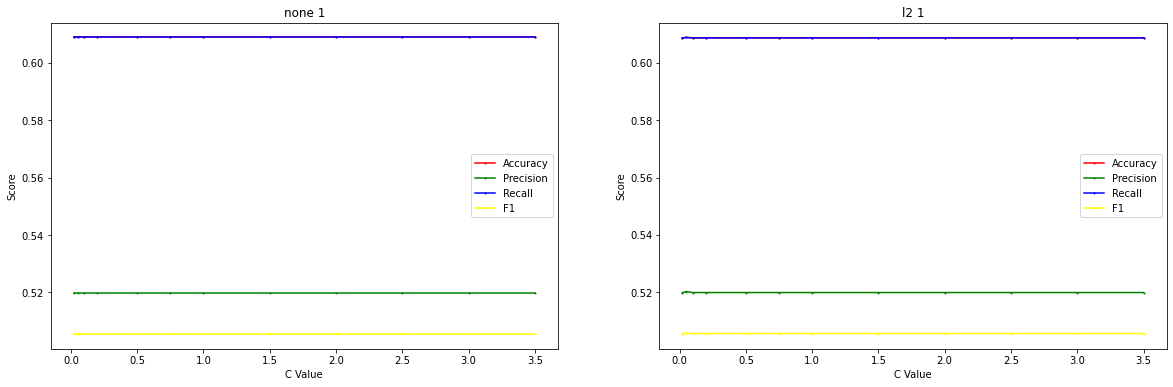

In [18]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in log_accuracy.items():
    sub = fig.add_subplot(1,2,m+1)

    sub.plot(C, log_accuracy[k], color='red', marker='o',
         markersize=1)
    sub.plot(C, log_precision[k], color='green', marker='o',
     markersize=1)
    sub.plot(C, log_recall[k], color='blue', marker='o',
     markersize=1)
    sub.plot(C, log_f1[k], color='yellow', marker='o',
     markersize=1)
    sub.set_title(str(k)+" "+str(i))
    sub.legend(l)
    sub.set_xlabel('C Value')
    sub.set_ylabel('Score')
    m = m +1 


From the above graphs, we can see that there are nearly no differences between choosing none penalty and l2 regularization penaly(varied really little), which is also similar in C. Considering that when choosing none penalty will ignore the influence of C, so picking l2 and C=1.0 as the hyperparameters.(It showed a trend of converge when C reaches a point near 1.0. 

There are no significant differences for the performance on test set.

In [72]:
logis = LogisticRegression(C=1.0,penalty='l2',max_iter=10000,n_jobs=-1)
logis.fit(x_train, y_train)
pred = logis.predict(x_test)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test, pred)))

Accuracy score is 0.6056298381421534
Precision score is 0.567021286667511
Recall score is 0.6056298381421534
F1 score is 0.5042291315207527
Report is               precision    recall  f1-score   support

           0       0.61      0.96      0.75      4232
           1       0.50      0.01      0.01       663
           2       0.50      0.11      0.18      2210

    accuracy                           0.61      7105
   macro avg       0.54      0.36      0.32      7105
weighted avg       0.57      0.61      0.50      7105



### Gaussian Bayes 

Try again with Gaussian Bayes algorithm. Since there are also continuous features in diabetes problem and Gaussian Bayes is fit for this kind of feature. 
There are only two hyperparameter which means the prior probability in the dataset. Since it is hard to measure and predict, I decided to use the algorithm automatically learn it. I just give the adjustment of smoothing factor.
Multinomial Bayes algorithm is not fit for negative value when using StandardScaler. Since I used standard scaler, it could not be applied. BernoulliNB is used for binary classification problem so it is also not fit for this problem.

In [84]:
var_smoothing = [0.02,0.05,0.1,0.2,0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5]
nb_accuracy = []
nb_precision = [] 
nb_recall = []
nb_f1 = []
for item in var_smoothing:
    gnb = GaussianNB(var_smoothing=item)
    gnb.fit(x_train, y_train)
    pred_i = log.predict(x_valid)
    nb_accuracy.append(metrics.accuracy_score(y_valid, pred_i))
    nb_precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
    nb_recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
    nb_f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

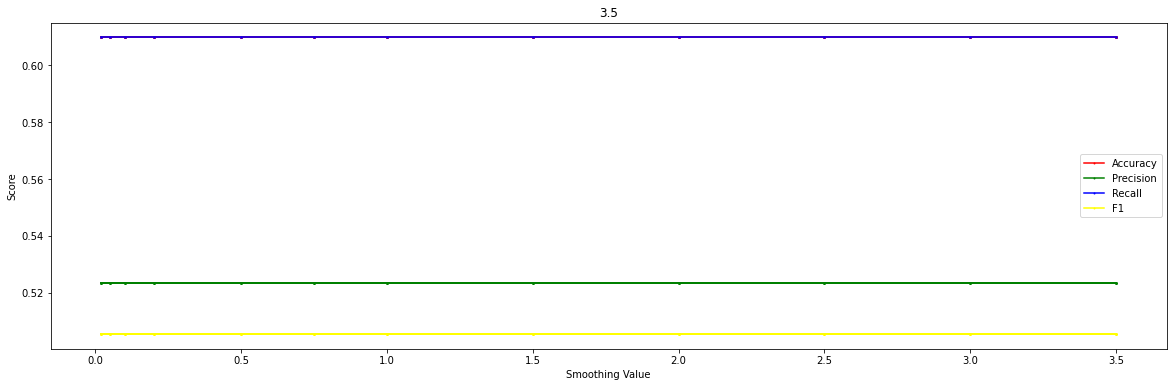

In [87]:
fig = plt.figure(figsize=(20, 6))
sub = fig.add_subplot(1,1,1)
for i in range(len(nb_accuracy)):
    sub.plot(var_smoothing , nb_accuracy, color='red', marker='o',
     markersize=1)
    sub.plot(var_smoothing, nb_precision, color='green', marker='o',
     markersize=1)
    sub.plot(var_smoothing, nb_recall, color='blue', marker='o',
     markersize=1)
    sub.plot(var_smoothing, nb_f1, color='yellow', marker='o',
     markersize=1)
    sub.set_title('Var_smoothing')
    sub.legend(l)
    sub.set_xlabel('Smoothing Value')
    sub.set_ylabel('Score')

The performance difference for varies smoothing factor is small, randomly choose 1.

The performance for Gaussian Bayes on the test set is not so good as other models. This may because I put all the features including the categorical ones into the models so it performs bad when predicting other two categories.

In [89]:
gnb = GaussianNB(var_smoothing=1)
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test, pred)))

Accuracy score is 0.35707248416608023
Precision score is 0.585746880063843
Recall score is 0.35707248416608023
F1 score is 0.2642084637345435
Report is               precision    recall  f1-score   support

           0       0.78      0.10      0.18      4232
           1       0.24      0.05      0.09       663
           2       0.32      0.94      0.48      2210

    accuracy                           0.36      7105
   macro avg       0.45      0.36      0.25      7105
weighted avg       0.59      0.36      0.26      7105



## 6:2:2 Split

### KNN

Using the same hyperparameters range for the new splited data set.

In [37]:
p = [1,2]
w = ['uniform','distance']
KNN1_accuracy = {}
KNN1_precision = {}
KNN1_recall = {}
KNN1_f1 = {}
for m in range(len(p)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(w)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for i in range(1,15):
            knn = KNeighborsClassifier(n_neighbors=i,weights=w[j],p=p[m],metric = 'minkowski',n_jobs=-1)
            knn.fit(x_train1, y_train1)
            pred_i = knn.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

        weight_accuracy[w[j]] = accuracy
        weight_precision[w[j]] = precision
        weight_recall[w[j]] = recall
        weight_f1[w[j]] = f1
    KNN1_accuracy[p[m]] = weight_accuracy
    KNN1_precision[p[m]] = weight_precision
    KNN1_recall[p[m]] = weight_recall
    KNN1_f1[p[m]] = weight_f1

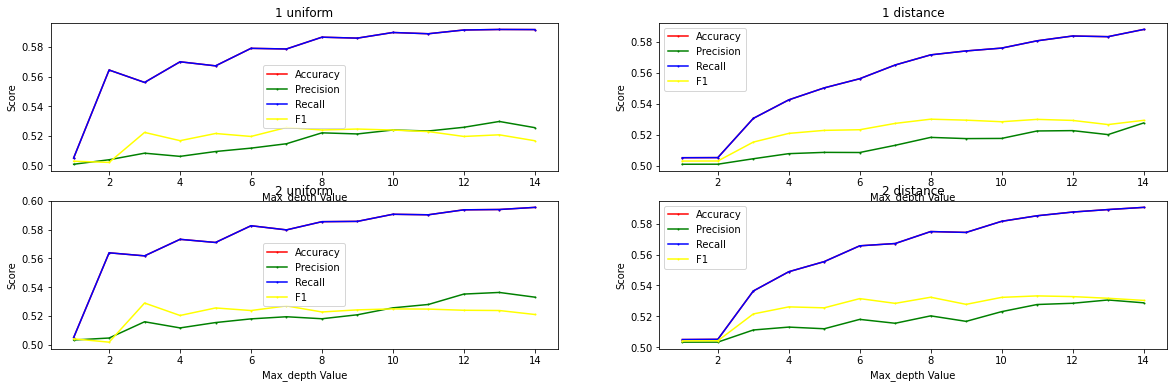

In [38]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in KNN1_accuracy.items():
    x = 0
    for i,j in KNN1_accuracy[k].items():
        sub = fig.add_subplot(2,2,m*2+x+1)

        sub.plot(range(1,15), KNN1_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN1_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN1_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(range(1,15), KNN1_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+i)
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

The performance curve almost same with the 6:2:2 split. There are no significant difference between the two split. It seems that the 6:2:2 curve is smoother and has slightly better performance.

In [40]:
p = [1,2]
w = ['uniform','distance']
neighbors = [15,20,30,50,75,100]
KNN1_accuracy = {}
KNN1_precision = {}
KNN1_recall = {}
KNN1_f1 = {}
for m in range(len(p)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(w)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for i in neighbors:
            knn = KNeighborsClassifier(n_neighbors=i,weights=w[j],p=p[m],metric = 'minkowski',n_jobs=-1)
            knn.fit(x_train1, y_train1)
            pred_i = knn.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

        weight_accuracy[w[j]] = accuracy
        weight_precision[w[j]] = precision
        weight_recall[w[j]] = recall
        weight_f1[w[j]] = f1
    KNN1_accuracy[p[m]] = weight_accuracy
    KNN1_precision[p[m]] = weight_precision
    KNN1_recall[p[m]] = weight_recall
    KNN1_f1[p[m]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


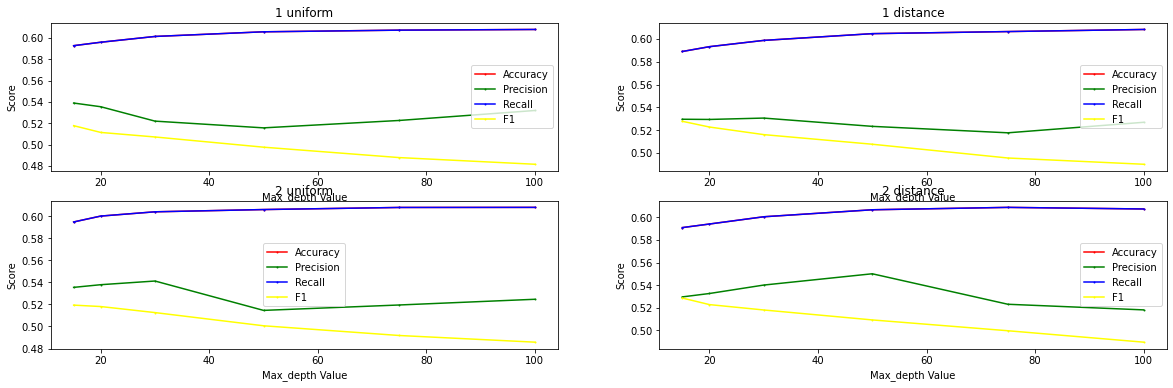

In [41]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in KNN1_accuracy.items():
    x = 0
    for i,j in KNN1_accuracy[k].items():
        sub = fig.add_subplot(2,2,m*2+x+1)

        sub.plot(neighbors, KNN1_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(neighbors, KNN1_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+i)
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

The difference is more obvious in K =[15,100], the local optimize point is not so convex than 8:1:1 split. This may because that as the number of validation set increases, it is harder to fit the model so well as before. And we still chooose the same hyperparameters, 'distance', 2 and K=8.

From the data classification report, we can see that the performance on 6:2:2 test set is better than that on the 8:1:1 test set. In this case, 6:2:2 split is better because the model can be more easily generailized instead of more dependant on the training set.

In [74]:
knn = KNeighborsClassifier(n_neighbors=12,weights='distance',p=2,metric = 'minkowski')
knn.fit(x_train1, y_train1)
pred = knn.predict(x_test1)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test1, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test1, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test1, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test1, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test1, pred)))

Accuracy score is 0.5792399718508093
Precision score is 0.5211758703921826
Recall score is 0.5792399718508093
F1 score is 0.522576146280478
Report is               precision    recall  f1-score   support

           0       0.62      0.85      0.72      8438
           1       0.27      0.02      0.04      1277
           2       0.41      0.23      0.29      4495

    accuracy                           0.58     14210
   macro avg       0.43      0.37      0.35     14210
weighted avg       0.52      0.58      0.52     14210



### Decision Tree

Using the same hyperparameters range for the new splited dataset.

In [44]:
max_features = ['sqrt','log2',None]
max_depth = [3,5,10,15,20,30,50,75,100]
criterion = ['entropy','gini']
tree1_accuracy = {}
tree1_precision = {}
tree1_recall = {}
tree1_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            dtc = DecisionTreeClassifier(criterion=criterion[i],max_features=max_features[j],max_depth=item)
            dtc.fit(x_train1, y_train1)
            pred_i = dtc.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='macro'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='macro'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='macro'))
        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree1_accuracy[criterion[i]] = weight_accuracy
    tree1_precision[criterion[i]] = weight_precision
    tree1_recall[criterion[i]] = weight_recall
    tree1_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

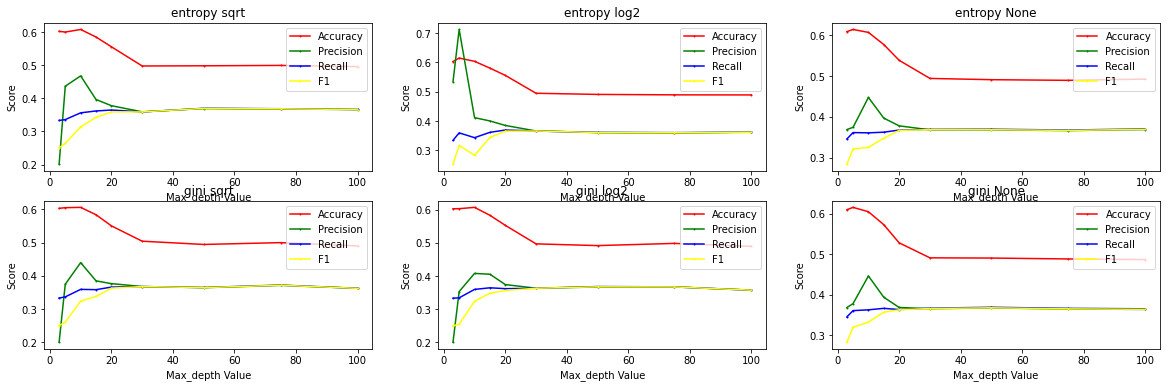

In [45]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items():
        sub = fig.add_subplot(2,3,m*3+x+1)

        sub.plot(max_depth, tree1_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

From the graphs we can see the curve on 6:2:2 is smoother. The trend is almost same as that on 8:1:1 dataset. Reset the range of K to see the performance.

In [76]:
max_features = ['sqrt','log2',None]
max_depth = [3,5,7,8,10,13,15,20,25]
criterion = ['entropy','gini']
tree1_accuracy = {}
tree1_precision = {}
tree1_recall = {}
tree1_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            dtc = DecisionTreeClassifier(criterion=criterion[i],max_features=max_features[j],max_depth=item)
            dtc.fit(x_train1, y_train1)
            pred_i = dtc.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))
        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree1_accuracy[criterion[i]] = weight_accuracy
    tree1_precision[criterion[i]] = weight_precision
    tree1_recall[criterion[i]] = weight_recall
    tree1_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

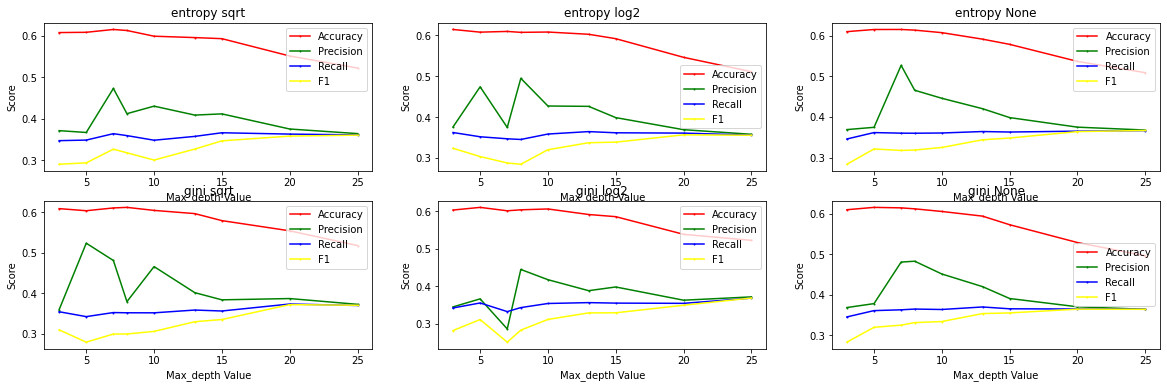

In [77]:
fig = plt.figure(figsize=(20, 6))
m = 0
l = ['Accuracy','Precision','Recall','F1']
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items():
        sub = fig.add_subplot(2,3,m*3+x+1)

        sub.plot(max_depth, tree1_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, tree1_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max_depth Value')
        sub.set_ylabel('Score')
        x = x + 1
    m = m + 1

Max_depth = 8, gini and None will have a smoother and higher score, which is same as that on 8:1:1 dataset.

To test the performance on the 6:2:2 dataset. Actually the difference is really insignificant and 6:2:2 is slightly better. Decision Tree tends to have higher accuracy and provided with small max_depth value,it does not overfit.

In [78]:
tree = DecisionTreeClassifier(criterion='gini',max_features=None,max_depth=8)
tree.fit(x_train1, y_train1)
pred = tree.predict(x_test1)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test1, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test1, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test1, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test1, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test1, pred)))

Accuracy score is 0.6048557353976073
Precision score is 0.5459739934336642
Recall score is 0.6048557353976073
F1 score is 0.5132739318605434
Report is               precision    recall  f1-score   support

           0       0.62      0.94      0.75      8438
           1       0.28      0.01      0.03      1277
           2       0.49      0.14      0.21      4495

    accuracy                           0.60     14210
   macro avg       0.46      0.36      0.33     14210
weighted avg       0.55      0.60      0.51     14210



In [30]:
max_features = ['sqrt','log2',None]
max_depth = [5,10,15,20,30,40,50]
criterion = ['entropy','gini']
n_estimators = [50,100,150,200]
tree_accuracy = {}
tree_precision = {}
tree_recall = {}
tree_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=8,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree_accuracy[criterion[i]] = weight_accuracy
    tree_precision[criterion[i]] = weight_precision
    tree_recall[criterion[i]] = weight_recall
    tree_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

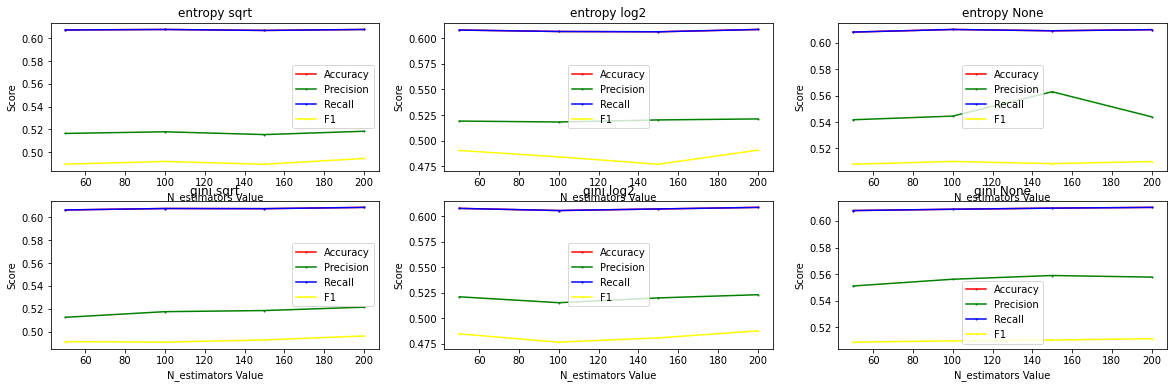

In [32]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, tree_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

### Logistic Regression

In [46]:
penalty = ['none','l2']
C = [0.02,0.05,0.1,0.2,0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5]
log1_accuracy = {}
log1_precision = {}
log1_recall = {}
log1_f1 = {}
for i in range(len(penalty)):
    accuracy = []
    precision = [] 
    recall = []
    f1 = []
    for item in C:
        log = LogisticRegression(C=item,penalty=penalty[i],max_iter=10000,n_jobs=-1)
        log.fit(x_train1, y_train1)
        pred_i = log.predict(x_valid1)
        accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
        precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
        recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
        f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))
    log1_accuracy[penalty[i]] = accuracy
    log1_precision[penalty[i]] = precision
    log1_recall[penalty[i]] = recall
    log1_f1[penalty[i]] = f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' w

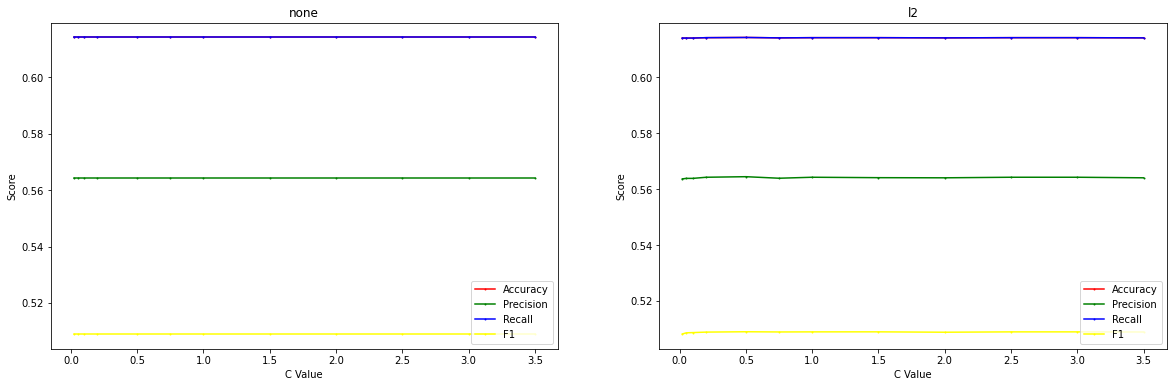

In [47]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in log1_accuracy.items():
    sub = fig.add_subplot(1,2,m+1)

    sub.plot(C, log1_accuracy[k], color='red', marker='o',
         markersize=1)
    sub.plot(C, log1_precision[k], color='green', marker='o',
     markersize=1)
    sub.plot(C, log1_recall[k], color='blue', marker='o',
     markersize=1)
    sub.plot(C, log1_f1[k], color='yellow', marker='o',
     markersize=1)
    sub.set_title(str(k))
    sub.legend(l)
    sub.set_xlabel('C Value')
    sub.set_ylabel('Score')
    m = m +1 

The performance for logistic regression at two datasets is almost same. Choosing C=1.0 and penalty = l2.Logistic Regression is easy, which might have a higher resistence for the noise on the dataset. On the other hand, this may also mean that the difference for dataset is small.

In [75]:
logis1 = LogisticRegression(C=1.0,penalty='l2',max_iter=10000,n_jobs=-1)
logis1.fit(x_train1, y_train1)
pred = logis1.predict(x_test1)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test1, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test1, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test1, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test1, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test1, pred)))

Accuracy score is 0.6056298381421534
Precision score is 0.567021286667511
Recall score is 0.6056298381421534
F1 score is 0.5042291315207527
Report is               precision    recall  f1-score   support

           0       0.61      0.96      0.75      4232
           1       0.50      0.01      0.01       663
           2       0.50      0.11      0.18      2210

    accuracy                           0.61      7105
   macro avg       0.54      0.36      0.32      7105
weighted avg       0.57      0.61      0.50      7105



### Gaussian Bayes

In [68]:
gnb1 = GaussianNB()
gnb1.fit(x_train1, y_train1)
pred = gnb1.predict(x_valid1)
print("Accuracy score is {}".format(metrics.accuracy_score(y_valid1, pred)))
print("Precision score is {}".format(metrics.precision_score(y_valid1, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_valid1, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_valid1, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_valid1, pred)))

Accuracy score is 0.30691815046801324
Precision score is 0.6645582022998552
Recall score is 0.30691815046801324
F1 score is 0.2014029627087511
Report is               precision    recall  f1-score   support

           0       0.91      0.03      0.07      8564
           1       0.14      0.27      0.18      1241
           2       0.33      0.85      0.47      4404

    accuracy                           0.31     14209
   macro avg       0.46      0.38      0.24     14209
weighted avg       0.66      0.31      0.20     14209



The Gaussian Bayes still performs so bad on the 6:2:2 dataset.The reason for this is same as mentioned above.

In [79]:
pred = gnb1.predict(x_test1)
print("Accuracy score is {}".format(metrics.accuracy_score(y_test1, pred)))
print("Precision score is {}".format(metrics.precision_score(y_test1, pred,average='weighted')))
print("Recall score is {}".format(metrics.recall_score(y_test1, pred,average='weighted')))
print("F1 score is {}".format(metrics.f1_score(y_test1, pred,average='weighted')))
print("Report is {}".format(metrics.classification_report(y_test1, pred)))

Accuracy score is 0.11013370865587614
Precision score is 0.6197077967442184
Recall score is 0.11013370865587614
F1 score is 0.05788353541423382
Report is               precision    recall  f1-score   support

           0       0.91      0.03      0.06      8438
           1       0.09      0.98      0.17      1277
           2       0.22      0.01      0.02      4495

    accuracy                           0.11     14210
   macro avg       0.41      0.34      0.08     14210
weighted avg       0.62      0.11      0.06     14210



## Ensemble

This part is for different ensembles. I choose random forest, voting classifier, baggin and gradientboosting.

### Random Forest

This part will train the random forest ensemble based on the two dataset(6:2:2 split and 8:1:1 split) and adjust the hyperparameters separately. For the parameters, I choose max_features,criteron, n_estimators and max_depth. Firstly, set a max_depth and adjust other three. Since the Random Forest contains many decision trees, set the max_depth to 12 which has the best performance based on former adjusting.

In [80]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
n_estimators = [50,70,80,90,100,110,120,130,150]
tree_accuracy = {}
tree_precision = {}
tree_recall = {}
tree_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=12,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    tree_accuracy[criterion[i]] = weight_accuracy
    tree_precision[criterion[i]] = weight_precision
    tree_recall[criterion[i]] = weight_recall
    tree_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

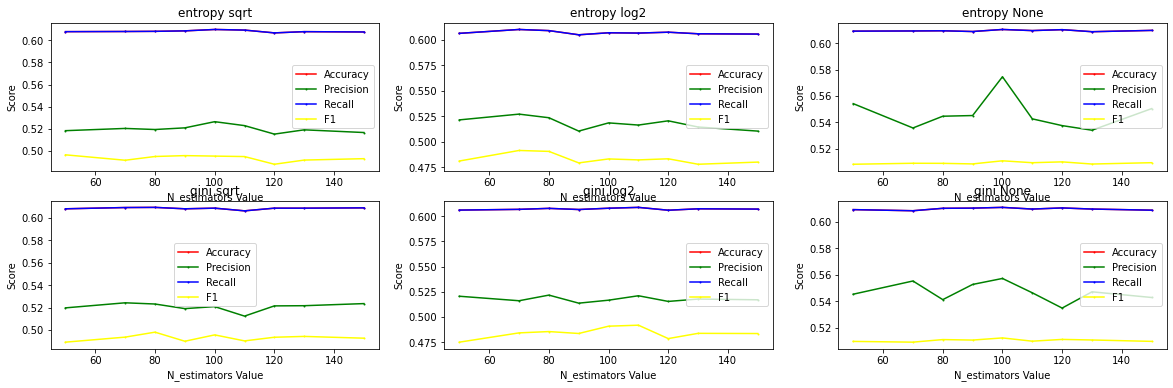

In [81]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in tree_accuracy.items():
    x = 0
    for i,j in tree_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, tree_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, tree_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

Reset the range of n_estimators to [20,80] and [110,250] to see the changes of curves.

In [82]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
n_estimators = [20,30,40,50,60,70,80]
forest2_accuracy = {}
forest2_precision = {}
forest2_recall = {}
forest2_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=8,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest2_accuracy[criterion[i]] = weight_accuracy
    forest2_precision[criterion[i]] = weight_precision
    forest2_recall[criterion[i]] = weight_recall
    forest2_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

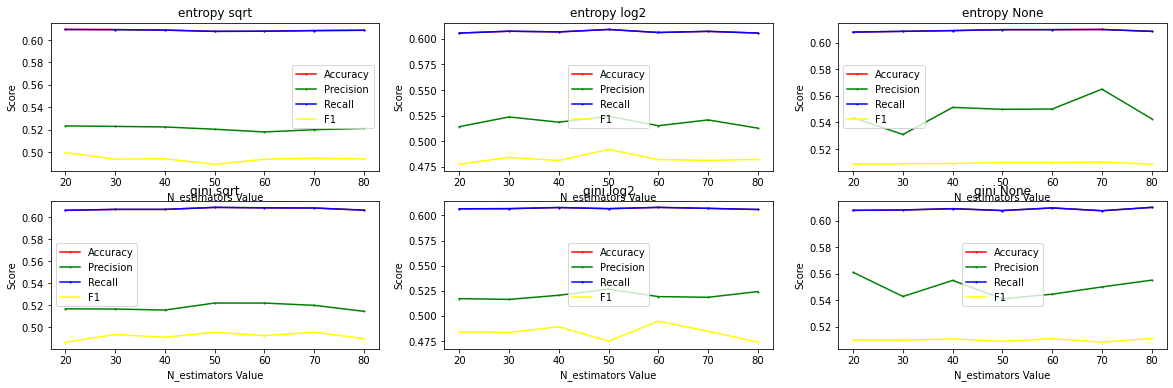

In [83]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest2_accuracy.items():
    x = 0
    for i,j in forest2_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, forest2_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

In [90]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
n_estimators = [110,115,120,135,150,175,200,250]
forest2_accuracy = {}
forest2_precision = {}
forest2_recall = {}
forest2_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=8,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest2_accuracy[criterion[i]] = weight_accuracy
    forest2_precision[criterion[i]] = weight_precision
    forest2_recall[criterion[i]] = weight_recall
    forest2_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

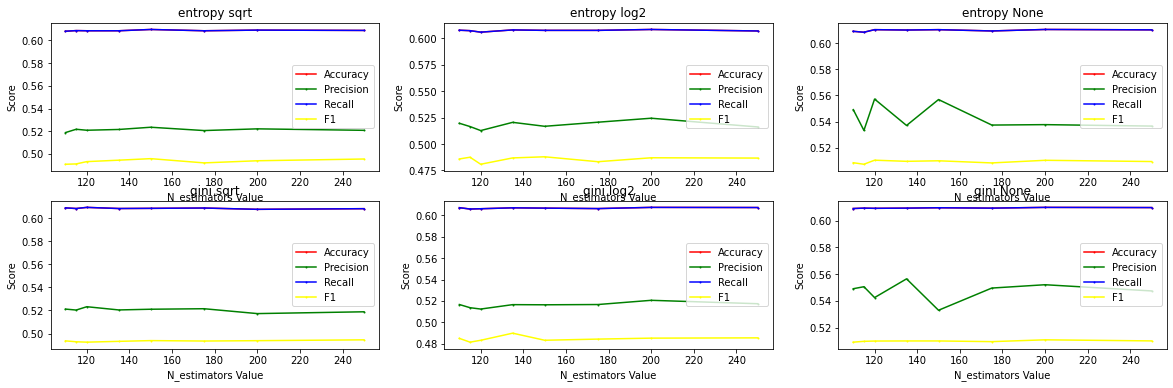

In [91]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest2_accuracy.items():
    x = 0
    for i,j in forest2_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, forest2_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest2_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

Actually the performance does not change too much. So choose n_estimators = 100 which is a local optimize point to adjust the max_depth.

In [92]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
max_depth = [3,5,10,15,20,30,50,75,100]
forest2_accuracy = {}
forest2_precision = {}
forest2_recall = {}
forest2_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            rf_clf = RandomForestClassifier(n_estimators=100, max_depth=item,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest2_accuracy[criterion[i]] = weight_accuracy
    forest2_precision[criterion[i]] = weight_precision
    forest2_recall[criterion[i]] = weight_recall
    forest2_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

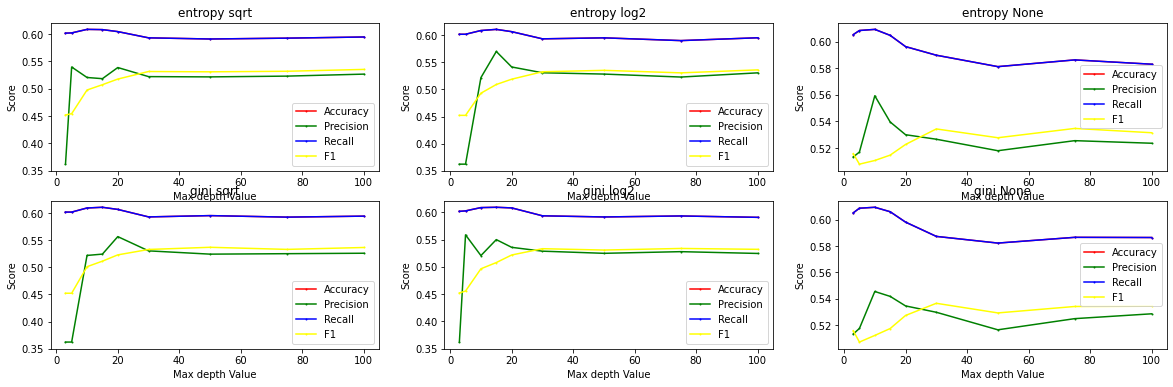

In [94]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest2_accuracy.items():
    x = 0
    for i,j in forest2_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(max_depth, forest2_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max depth Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

Gini and log2 has better performance and the curve converges at around 20, reset the range of max_depth.

In [95]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
max_depth = [5,7,8,10,12,15,17,20,25,30]
forest2_accuracy = {}
forest2_precision = {}
forest2_recall = {}
forest2_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            rf_clf = RandomForestClassifier(n_estimators=100, max_depth=item,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest2_accuracy[criterion[i]] = weight_accuracy
    forest2_precision[criterion[i]] = weight_precision
    forest2_recall[criterion[i]] = weight_recall
    forest2_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

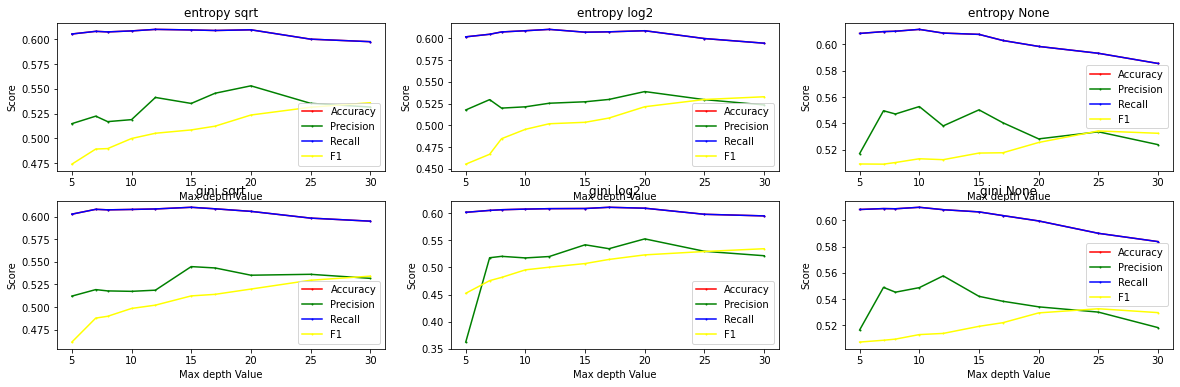

In [96]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest2_accuracy.items():
    x = 0
    for i,j in forest2_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(max_depth, forest2_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, forest2_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max depth Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

Choose max_depth = 20 as the hyperparameter. Random Forest performed slightly better than singel decision tree.

Train the model again based on 6:2:2 split dataset. For the parameters, I choose max_features,criteron, n_estimators and max_depth. Firstly, set a max_depth and adjust other three. Since the Random Forest contains many decision trees, set the max_depth to 12 which has the best performance based on former adjusting.

In [55]:
max_features = ['sqrt','log2',None]
max_depth = [5,10,15,20,30,40,50]
criterion = ['entropy','gini']
n_estimators = [50,70,80,90,100,110,120,130,150]
forest3_accuracy = {}
forest3_precision = {}
forest3_recall = {}
forest3_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=12,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train1, y_train1)
            pred_i = rf_clf.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest3_accuracy[criterion[i]] = weight_accuracy
    forest3_precision[criterion[i]] = weight_precision
    forest3_recall[criterion[i]] = weight_recall
    forest3_f1[criterion[i]] = weight_f1

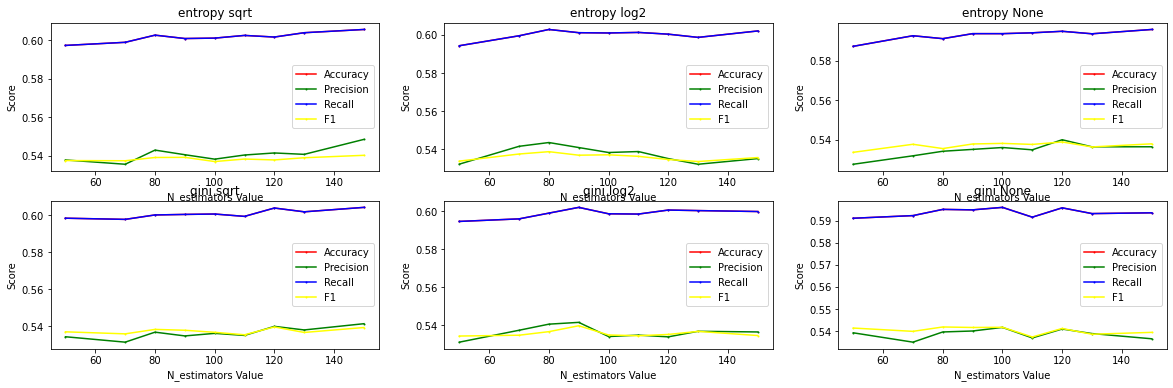

In [56]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest3_accuracy.items():
    x = 0
    for i,j in forest3_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, forest3_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest3_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest3_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest3_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

The performance is similar to that on 8:1:1 split dataset. It seems that 6:2:2 model is slightly better, which is smoother and varied less. Then adjusting the max_depth using n_estimator = 100.

In [97]:
max_features = ['sqrt','log2',None]
criterion = ['entropy','gini']
max_depth = [50,60,70,80,90,100,150,200]
forest5_accuracy = {}
forest5_precision = {}
forest5_recall = {}
forest5_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            rf_clf = RandomForestClassifier(n_estimators=100, max_depth=item,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train, y_train)
            pred_i = rf_clf.predict(x_valid)
            accuracy.append(metrics.accuracy_score(y_valid, pred_i))
            precision.append(metrics.precision_score(y_valid, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest5_accuracy[criterion[i]] = weight_accuracy
    forest5_precision[criterion[i]] = weight_precision
    forest5_recall[criterion[i]] = weight_recall
    forest5_f1[criterion[i]] = weight_f1

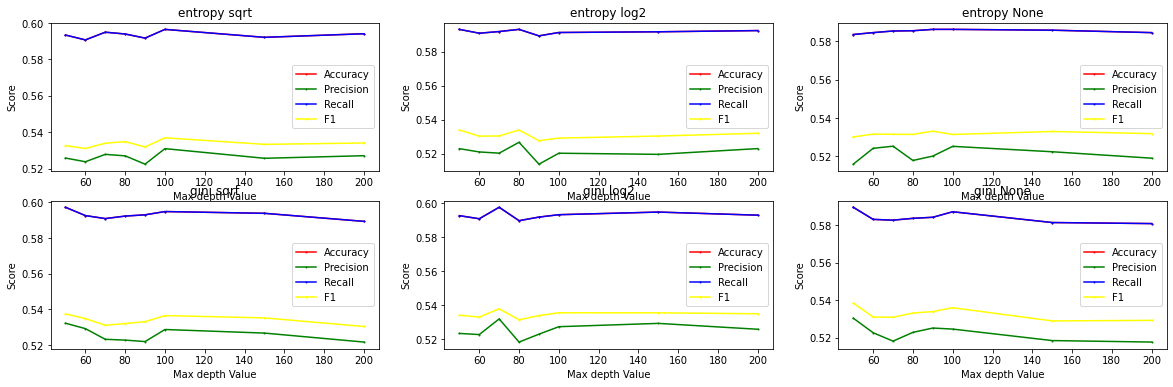

In [99]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest5_accuracy.items():
    x = 0
    for i,j in forest5_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(max_depth, forest5_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, forest5_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, forest5_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, forest5_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('Max depth Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

Reset the range to [5,50], since too big max_depth may cause overfitting and cannot see the difference.

In [100]:
max_features = ['sqrt','log2',None]
max_depth = [5,10,15,20,30,40,50]
criterion = ['entropy','gini']
n_estimators = [10,20,30,40,50]
forest6_accuracy = {}
forest6_precision = {}
forest6_recall = {}
forest6_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in max_depth:
            rf_clf = RandomForestClassifier(n_estimators=100, max_depth=item,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train1, y_train1)
            pred_i = rf_clf.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest6_accuracy[criterion[i]] = weight_accuracy
    forest6_precision[criterion[i]] = weight_precision
    forest6_recall[criterion[i]] = weight_recall
    forest6_f1[criterion[i]] = weight_f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

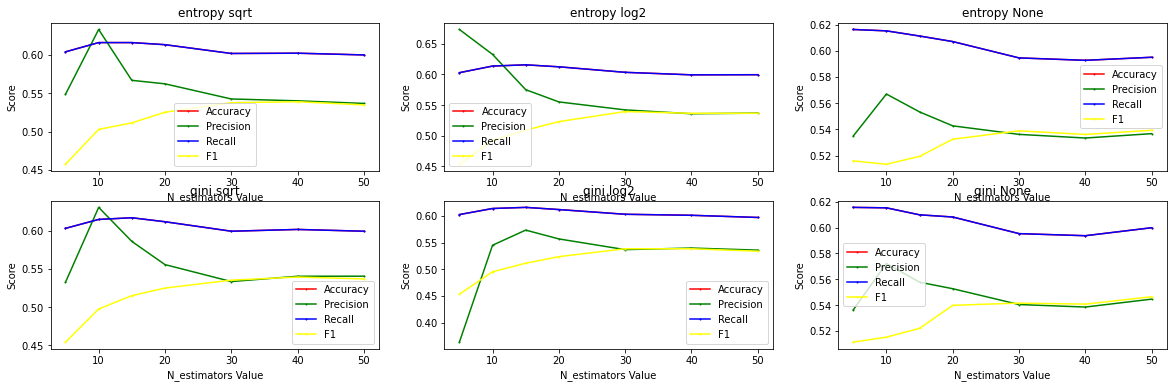

In [101]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest6_accuracy.items():
    x = 0
    for i,j in forest6_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot( max_depth, forest6_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(max_depth, forest6_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(max_depth, forest6_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(max_depth, forest6_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

From the above graphs, we can see the max_depth=10, gini and log2 tend to be the best parameter based on this dataset because the four curves are smoother and high enough.

In [59]:
max_features = ['sqrt','log2',None]
max_depth = [5,10,15,20,30,40,50]
criterion = ['entropy','gini']
n_estimators = [140,150,160,170,180,200]
forest5_accuracy = {}
forest5_precision = {}
forest5_recall = {}
forest5_f1 = {}
for i in range(len(criterion)):
    weight_accuracy = {}
    weight_precision = {}
    weight_recall = {}
    weight_f1 = {}
    for j in range(len(max_features)):
        accuracy = []
        precision = [] 
        recall = []
        f1 = []
        for item in n_estimators:
            rf_clf = RandomForestClassifier(n_estimators=item, max_depth=10,max_features=max_features[j],criterion=criterion[i])
            rf_clf.fit(x_train1, y_train1)
            pred_i = rf_clf.predict(x_valid1)
            accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
            precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
            recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
            f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

        weight_accuracy[max_features[j]] = accuracy
        weight_precision[max_features[j]] = precision
        weight_recall[max_features[j]] = recall
        weight_f1[max_features[j]] = f1
    forest5_accuracy[criterion[i]] = weight_accuracy
    forest5_precision[criterion[i]] = weight_precision
    forest5_recall[criterion[i]] = weight_recall
    forest5_f1[criterion[i]] = weight_f1

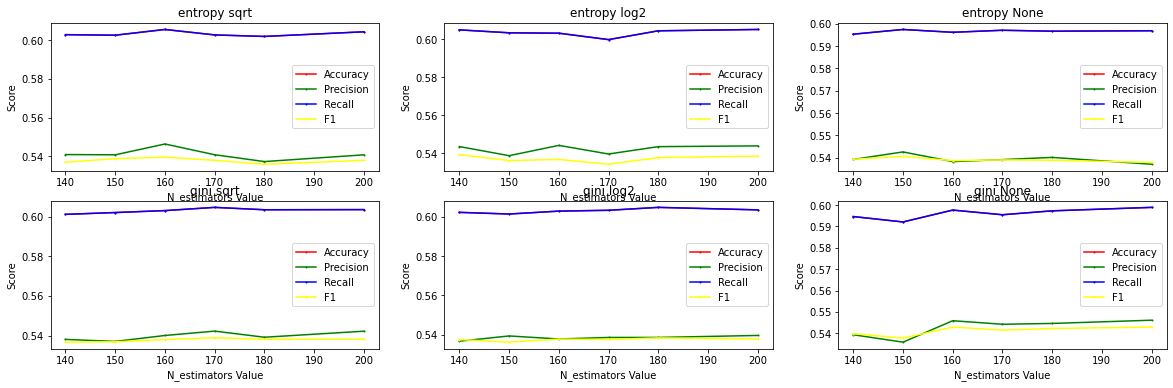

In [60]:
fig = plt.figure(figsize=(20, 6))
m = 0
for k,v in forest5_accuracy.items():
    x = 0
    for i,j in forest5_accuracy[k].items(): 
        sub = fig.add_subplot(2,3,m*3+x+1)
        sub.plot(n_estimators, forest5_accuracy[k][i], color='red', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest5_precision[k][i], color='green', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest5_recall[k][i], color='blue', marker='o',
         markersize=1)
        sub.plot(n_estimators, forest5_f1[k][i], color='yellow', marker='o',
         markersize=1)
        sub.set_title(str(k)+" "+str(i))
        sub.legend(l)
        sub.set_xlabel('N_estimators Value')
        sub.set_ylabel('Score')
        x = x +1
    m = m +1 

There are no significant difference for higher n_estimators.

As for random forest, it performs better than single decision tree and better on 6:2:2 dataset. It can be also added to voting classifier for next step training.

### Voting Classifier

In voting classifier, since in the former experiment, Gaussian Bayes performed bad, so I decided to try two different classifier which has random forest, Gaussian Bayes, KNN, logistic regression and decision tree while the other is just use four classifier except Gaussian Bayes. This voting classifier will use the models with the best hyperparameters selected above. And using 6:2:2 split dataset to make sure it can be better generalized. 

In [41]:
tree_clf = DecisionTreeClassifier(max_depth=8,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=12)

voting_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf),('GaussianNB', gnb_clf),('KNN',knn_clf)], weights=None)
voting_clf.fit(x_train1, y_train1)
pred = voting_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      8612
           1       0.37      0.01      0.02      1214
           2       0.51      0.11      0.18      4383

    accuracy                           0.62     14209
   macro avg       0.50      0.36      0.32     14209
weighted avg       0.57      0.62      0.52     14209



The performance of voting classifier on test set is slightly worse than that on validation set. But the error is acceptable since only 1%.

In [42]:
pred_v = voting_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75      8479
           1       0.38      0.01      0.02      1317
           2       0.50      0.11      0.18      4414

    accuracy                           0.61     14210
   macro avg       0.50      0.36      0.32     14210
weighted avg       0.56      0.61      0.50     14210



Actually, from the classification report we can see the score for the voting classifier without Gaussian Bayes is better. I will also use this model to change the voting hyperparameter and see the difference. The weights is hard to measure so I decided not to use it.(Actually, you can also think about that I give a zero weights to the Gaussian Bayes classifier, which is same as I kicked it out from the voting classifier.

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=30,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)

voting4_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf),('KNN',knn_clf)], weights=None)
voting4_clf.fit(x_train1, y_train1)
pred = voting4_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76      8612
           1       0.50      0.01      0.01      1214
           2       0.50      0.07      0.13      4383

    accuracy                           0.61     14209
   macro avg       0.54      0.35      0.30     14209
weighted avg       0.57      0.61      0.50     14209



In [44]:
pred_v = voting4_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      8479
           1       0.43      0.00      0.01      1317
           2       0.53      0.08      0.14      4414

    accuracy                           0.61     14210
   macro avg       0.52      0.35      0.30     14210
weighted avg       0.57      0.61      0.49     14210



In [51]:
tree_clf = DecisionTreeClassifier(max_depth=30,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)

hard_voting_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf),('KNN',knn_clf)], voting='hard')
hard_voting_clf.fit(x_train1, y_train1)
pred = hard_voting_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76      8612
           1       0.42      0.01      0.01      1214
           2       0.49      0.07      0.12      4383

    accuracy                           0.61     14209
   macro avg       0.51      0.35      0.30     14209
weighted avg       0.56      0.61      0.50     14209



In [52]:
pred_v = hard_voting_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      8479
           1       0.56      0.00      0.01      1317
           2       0.53      0.07      0.13      4414

    accuracy                           0.61     14210
   macro avg       0.56      0.35      0.30     14210
weighted avg       0.58      0.61      0.49     14210



In [49]:
tree_clf = DecisionTreeClassifier(max_depth=30,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)

soft_voting_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf),('KNN',knn_clf)], voting='soft')
soft_voting_clf.fit(x_train1, y_train1)
pred = soft_voting_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      8612
           1       0.19      0.04      0.06      1214
           2       0.39      0.28      0.33      4383

    accuracy                           0.57     14209
   macro avg       0.40      0.37      0.37     14209
weighted avg       0.52      0.57      0.54     14209



In [50]:
pred_v = soft_voting_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      8479
           1       0.20      0.03      0.06      1317
           2       0.38      0.27      0.32      4414

    accuracy                           0.57     14210
   macro avg       0.40      0.37      0.36     14210
weighted avg       0.51      0.57      0.52     14210



By comparing the soft voing and hard voting, which means to use the sum of probabilities or the just the major voting, it seems that hard is better on the test set so just use the default 'hard' is ok. This voting classifier also performs slightly better than random forest, which is reasonable because it fuse the random forest into this.

In [55]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
pred_v = voting_clf.predict(x_test1)
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
pred_v = voting4_clf.predict(x_test1)
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
pred_v = hard_voting_clf.predict(x_test1)
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
pred_v = soft_voting_clf.predict(x_test1)
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))

Test the performance again for 3 voting models. One using random forest and the other use KNN since these are the best and the worst separately.

In [57]:
tree_clf = DecisionTreeClassifier(max_depth=30,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)

voting3_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf)], voting='hard')
voting3_clf.fit(x_train1, y_train1)
pred = voting3_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))
pred_v = voting3_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76      8612
           1       0.60      0.00      0.00      1214
           2       0.49      0.09      0.15      4383

    accuracy                           0.61     14209
   macro avg       0.57      0.35      0.30     14209
weighted avg       0.58      0.61      0.50     14209

              precision    recall  f1-score   support

           0       0.61      0.97      0.75      8479
           1       0.67      0.00      0.00      1317
           2       0.49      0.09      0.15      4414

    accuracy                           0.61     14210
   macro avg       0.59      0.35      0.30     14210
weighted avg       0.58      0.61      0.49     14210



In [58]:
tree_clf = DecisionTreeClassifier(max_depth=30,criterion='gini',max_features=None)
log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)

voting3_1_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('KNN',knn_clf)], voting='hard')
voting3_1_clf.fit(x_train1, y_train1)
pred = voting3_1_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))
pred_v = voting3_1_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))
accuracy_scores.append(metrics.accuracy_score(y_pred=pred_v, y_true=y_test1))
precision_scores.append(metrics.precision_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
recall_scores.append(metrics.recall_score(y_pred=pred_v, y_true=y_test1,average='weighted'))
f1_scores.append(metrics.f1_score(y_pred=pred_v, y_true=y_test1,average='weighted'))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      8612
           1       0.31      0.01      0.02      1214
           2       0.43      0.17      0.24      4383

    accuracy                           0.60     14209
   macro avg       0.45      0.36      0.34     14209
weighted avg       0.54      0.60      0.53     14209

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      8479
           1       0.28      0.01      0.03      1317
           2       0.42      0.16      0.23      4414

    accuracy                           0.59     14210
   macro avg       0.44      0.36      0.33     14210
weighted avg       0.52      0.59      0.51     14210



The model with random forest performed much better than that for knn, since the random forest has higher scores than knn.

I learned how to draw the histo plot on matploblib from this link https://blog.csdn.net/qq_29721419/article/details/71638912.

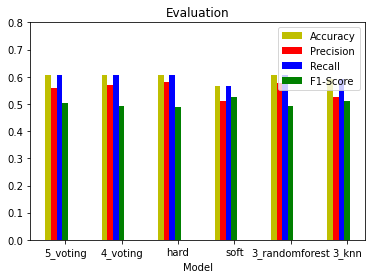

In [66]:
models =['5_voting','4_voting','hard','soft','3_randomforest','3_knn']
x = list(range(len(models)))
total_width, n = 0.8, 8
width = total_width / n
plt.bar(x, accuracy_scores, label='Accuracy',width=width,tick_label = models,fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, precision_scores, label='Precision',width=width,tick_label = models,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, recall_scores, label='Recall',width=width,tick_label = models,fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, f1_scores, label='F1-Score',width=width,tick_label = models,fc = 'g')
plt.xlabel("Model")
plt.title("Evaluation")
plt.ylim(0, 0.8)
plt.legend()
plt.show()

From the above figure, we can see that the 3 voting with random forest, decision tree and logistic regression has the best performance while the next is the 4 voting with hard one. This is because the models with worse performance like KNN and Gaussian Bayes are dropped. It seemed no reason that soft 4 voting performed bad, which may resulted from the noise on the dataset.

### Bagging

For bagging classifier, I will use the Logistic, Decision Tree, KNN and Gaussian Bayes as the base classifier separately to train four bagging model. In this process, each base classifier will be set the best hyperparameters selected to make sure the performance will not be reduced by using wrong base model. The process will be done on 6:2:2 split dataset since it is slightly better on previous experiments.

In [67]:
base_log_reg = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
bag_clf = BaggingClassifier(base_estimator=base_log_reg, n_estimators=10)

bag_clf.fit(x_train1, y_train1)
pred = bag_clf.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      8612
           1       0.25      0.00      0.00      1214
           2       0.48      0.11      0.18      4383

    accuracy                           0.61     14209
   macro avg       0.45      0.36      0.31     14209
weighted avg       0.55      0.61      0.51     14209



In [68]:
pred_v = bag_clf.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75      8479
           1       0.50      0.00      0.01      1317
           2       0.49      0.11      0.18      4414

    accuracy                           0.61     14210
   macro avg       0.54      0.36      0.31     14210
weighted avg       0.57      0.61      0.51     14210



In [69]:
base_tree = DecisionTreeClassifier(max_depth=8,criterion='gini',max_features=None)
bag_clf_tree = BaggingClassifier(base_estimator=base_tree, n_estimators=10)

bag_clf_tree.fit(x_train1, y_train1)
pred = bag_clf_tree.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75      8612
           1       0.30      0.00      0.01      1214
           2       0.47      0.12      0.19      4383

    accuracy                           0.61     14209
   macro avg       0.47      0.36      0.32     14209
weighted avg       0.55      0.61      0.52     14209



In [70]:
pred_v = bag_clf_tree.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75      8479
           1       0.13      0.00      0.00      1317
           2       0.47      0.12      0.19      4414

    accuracy                           0.60     14210
   macro avg       0.41      0.36      0.31     14210
weighted avg       0.53      0.60      0.51     14210



In [71]:
base_knn =KNeighborsClassifier(p=2,weights='distance',n_neighbors=10)
bag_clf_knn = BaggingClassifier(base_estimator=base_knn, n_estimators=10)

bag_clf_knn.fit(x_train1, y_train1)
pred = bag_clf_knn.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      8612
           1       0.17      0.02      0.03      1214
           2       0.40      0.25      0.30      4383

    accuracy                           0.58     14209
   macro avg       0.40      0.37      0.35     14209
weighted avg       0.52      0.58      0.53     14209



In [72]:
pred_v = bag_clf_knn.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71      8479
           1       0.25      0.03      0.05      1317
           2       0.39      0.25      0.30      4414

    accuracy                           0.58     14210
   macro avg       0.42      0.37      0.36     14210
weighted avg       0.52      0.58      0.52     14210



In [73]:
base_gnb =GaussianNB(var_smoothing=1)
bag_clf_gnb = BaggingClassifier(base_estimator=base_gnb, n_estimators=10)

bag_clf_gnb.fit(x_train1, y_train1)
pred = bag_clf_gnb.predict(x_valid1)
print(metrics.classification_report(y_pred=pred, y_true=y_valid1))

              precision    recall  f1-score   support

           0       0.76      0.16      0.26      8612
           1       0.34      0.03      0.05      1214
           2       0.33      0.92      0.48      4383

    accuracy                           0.38     14209
   macro avg       0.48      0.37      0.27     14209
weighted avg       0.59      0.38      0.31     14209



In [74]:
pred_v = bag_clf_gnb.predict(x_test1)
print(metrics.classification_report(y_pred=pred_v, y_true=y_test1))

              precision    recall  f1-score   support

           0       0.74      0.17      0.27      8479
           1       0.26      0.02      0.04      1317
           2       0.33      0.91      0.48      4414

    accuracy                           0.38     14210
   macro avg       0.44      0.37      0.27     14210
weighted avg       0.57      0.38      0.31     14210



From the classification report on the test set for four bagging classifier, using logistic regression or decision tree as the base classifier will have a better evaluation score, actually the two model perform better on previous experiments. Bagging will slightly improve the score than just using one. Bagging's performance is slightly than voting and similar to random forest. To use the decision tree as the classifier is almost same as that for random forest when using n_estimators = 100, gini, log2 and max_depth = 10. Intrinclly, they are all ensembles based on decision tree so it is reasonable.

### Boosting

Finally it is boosting classifier, I decied to use gradient boosting. Actually, it is hard to adjust the hyperparameter because it is too time costing. 

In [13]:
X, x1, y, y1 = train_test_split(X, y, test_size=0.9)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.6)
x_valid1, x_test1, y_valid1, y_test1 = train_test_split(x_test1, y_test1, test_size=0.5)

In [30]:
learning_rate = [7,10,12,15,20,25]
n_estimators = [50,75,100,125,150]
gbc_accuracy = {}
gbc_precision = {}
gbc_recall = {}
gbc_f1 = {}

for j in range(len(n_estimators)):
    accuracy = []
    precision = [] 
    recall = []
    f1 = []
    for item in learning_rate:
        gb_clf = GradientBoostingClassifier(n_estimators=n_estimators[j],learning_rate=item)
        gb_clf.fit(x_train1, y_train1)
        pred_i = gb_clf.predict(x_valid1)
        accuracy.append(metrics.accuracy_score(y_valid1, pred_i))
        precision.append(metrics.precision_score(y_valid1, pred_i,average='weighted'))
        recall.append(metrics.recall_score(y_valid1, pred_i,average='weighted'))
        f1.append(metrics.f1_score(y_valid1, pred_i,average='weighted'))

    gbc_accuracy[n_estimators[j]] = accuracy
    gbc_precision[n_estimators[j]] = precision
    gbc_recall[n_estimators[j]] = recall
    gbc_f1[n_estimators[j]] = f1

C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


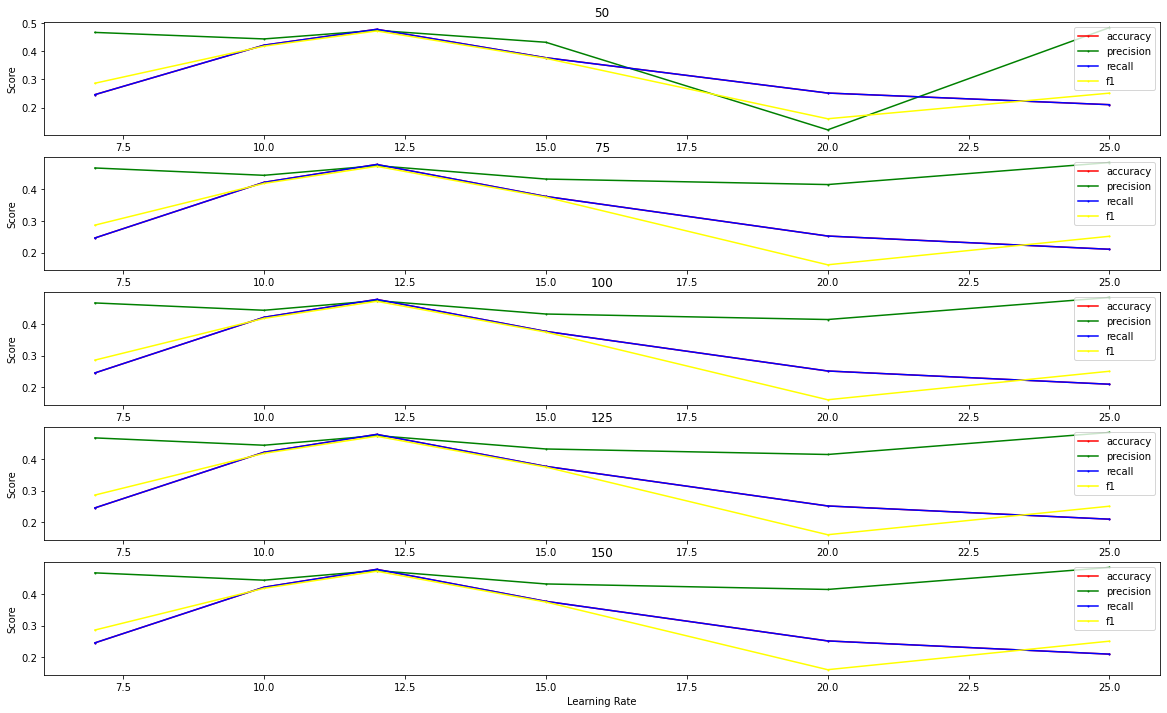

In [31]:
fig = plt.figure(figsize=(20, 12))
m = 0
l = ['accuracy','precision','recall','f1']
for k,v in gbc_accuracy.items(): 
    sub = fig.add_subplot(5,1,m + 1)
    sub.plot(learning_rate, gbc_accuracy[k], color='red', marker='o',
     markersize=1)
    sub.plot(learning_rate, gbc_precision[k], color='green', marker='o',
     markersize=1)
    sub.plot(learning_rate, gbc_recall[k], color='blue', marker='o',
     markersize=1)
    sub.plot(learning_rate, gbc_f1[k], color='yellow', marker='o',
     markersize=1)
    sub.set_title(str(k))
    sub.legend(l)
    sub.set_xlabel('Learning Rate')
    sub.set_ylabel('Score')
    m = m +1 

The performance for boosting is not so good as other ensembles via the graphs illustrates. Using the n_estimator=150 and leaning rate = 12. This may be caused by the noise on the dataset.

## Evaluation

This part will compare the performance of 8 models. Four basic, KNN, decision tree, logistic regression and Gaussian Bayes, and four ensemble, random forest, voting (using 3 models random forest, decision tree and logistic regression), bagging and boosting. All of those models(Hyperparameters adjusted and use the optimize ones) will be trained via k-fold cross validation and compared the final score. I have also thought about the confusion matrix. Since it is just the other way of precision, recall scores, I did not use it at last.

In [10]:
from sklearn.model_selection import cross_val_score
accuracy_scores_mean = []
precision_scores_mean = []
recall_scores_mean = []
f1_scores_mean = []
scores_std = []
tree_clf = DecisionTreeClassifier(max_depth=10,criterion='gini',max_features=None)
scores = cross_val_score(estimator=tree_clf, X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=tree_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=tree_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=tree_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

log_reg_clf = LogisticRegression(max_iter=10000,penalty='l2',C=1.0)
scores = cross_val_score(estimator=log_reg_clf, X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=log_reg_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=log_reg_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=log_reg_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())


knn_clf = KNeighborsClassifier(p=2,weights='distance',n_neighbors=12)
scores = cross_val_score(estimator=knn_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=knn_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=knn_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=knn_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

gnb_clf = GaussianNB(var_smoothing=1)
scores = cross_val_score(estimator=gnb_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gnb_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gnb_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gnb_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

randf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='log2',criterion='gini')
scores = cross_val_score(estimator=randf_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=randf_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=randf_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=randf_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

voting3_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf)], voting='hard')
scores = cross_val_score(estimator=voting3_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=voting3_clf , X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=voting3_clf , X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=voting3_clf , X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

bag_clf = BaggingClassifier(base_estimator=log_reg_clf, n_estimators=10)
scores = cross_val_score(estimator=bag_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=bag_clf , X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=bag_clf , X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=bag_clf , X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())

gb_clf = GradientBoostingClassifier(n_estimators=150,learning_rate=12)
scores = cross_val_score(estimator=gb_clf , X=X, y=y, cv=10, scoring='accuracy')
accuracy_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gb_clf, X=X, y=y, cv=10, scoring='precision_weighted')
precision_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gb_clf, X=X, y=y, cv=10, scoring='recall_weighted')
recall_scores_mean.append(scores.mean())
scores = cross_val_score(estimator=gb_clf, X=X, y=y, cv=10, scoring='f1_weighted')
f1_scores_mean.append(scores.mean())


C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tengf\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

Plot the models together to compare the performance. Reference:https://blog.csdn.net/th_num/article/details/80601800. I learned how to plot horizontal histo with scores.

(0.0, 0.8)

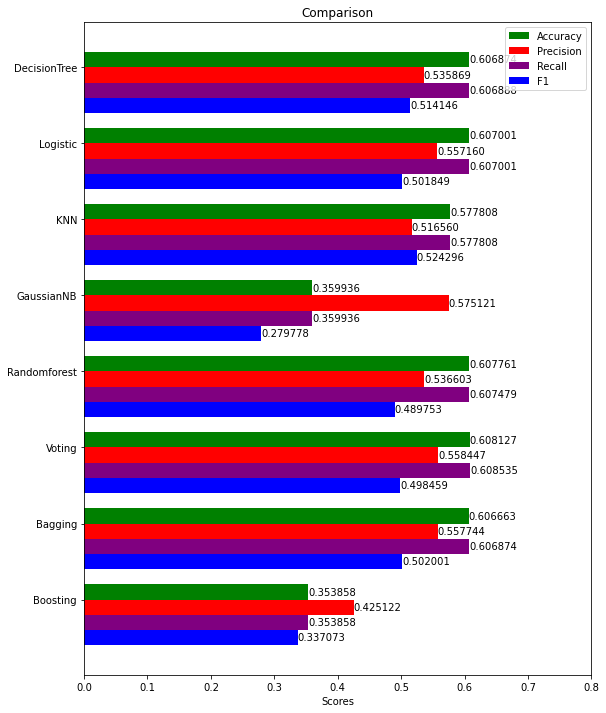

In [14]:
fig = plt.figure(figsize=(20,12))  
ax = fig.add_subplot(1,2,1)
models =['DecisionTree','Logistic','KNN','GaussianNB','Randomforest','Voting','Bagging','Boosting']
l = ['Accuracy','Precision','Recall','F1']
y_pos = np.arange(len(models))
total_width, n = 0.8, 4
width = total_width / n
y_pos=y_pos - (total_width - width) / 4

b=ax.barh(y_pos, accuracy_scores_mean, align='center',
        color='green', ecolor='black',height=0.2,label='accuracy')
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%w,ha='left',va='center')

b=ax.barh(y_pos+width, precision_scores_mean, align='center',
        color='red', ecolor='black',height=0.2,label='precision')
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%w,ha='left',va='center')

b=ax.barh(y_pos+width*2, recall_scores_mean, align='center',
    color='purple', ecolor='black',height=0.2,label='recall')
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%w,ha='left',va='center')
    
b=ax.barh(y_pos+width*3, f1_scores_mean, align='center',
    color='blue', ecolor='black',height=0.2,label='f1_score')
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%w,ha='left',va='center')
ax.set_yticks(y_pos+width/2.0)
ax.legend(l)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Scores')
ax.set_title('Comparison')
ax.set_xlim([0, 0.8])


## Conclusion

From the above graphs, we can see that:
1. In most cases, ensemble classifier will have a better performance score than basic classifier. Which is caused by ensembling model together can reduce the misclassification given by single classifier.
2. Gaussian NB and Boosting perform bad. The former is caused by the categorical feature in the dataset while the latter might be caused by the error when picking hyperparameters.(It is too time cosing so I just run it once).
3. In basic models, decision trees and logistic regression have higher score but it will cause more time for decision tree for parameter adjusting. Actually, logistic regression's parameter adjusting seems that cannot give obvious performance difference.
4. In ensemble models, voting with random forest, decision tree and logistic regression is the best, the next is logistic bagging while random forest follows. Actually, it is good to fuse models with higher score together so that the new ensemble classifier tend to have higher score. When use bad models in ensemble, the performance of ensemble will decrease like using Gaussian NB and KNN in voting.
5. Random forest is the ensemble of decision trees, in this case it tends to have higher performance score than decision trees.But a lot of time required to adjust the hyperparameters for random forest.
6. The different models perform diferent in different dataset. Normally, we can conclude that 6:2:2 split could be better and more easily generalized than 8:1:1 split. More generally, voting's performance and random forest's dropped comparing the result on test rather than cross validation, but the performance drop is acceptable so that they are not so sensitive to the dataset.The performance drop for basic single model is slightly more obvious, which means they may more easily affected by the noise on the dataset.
7. The model has normal performance's precision score is less than that of recall/accuracy, which might be caused by the negative target features number are more larger than class = 1 and class = 2. To balance the number may 

I think that grid search cv in the sklearn package is better for large range of parameter adjusting and it is more precise because it is done based on cross-validation. However, it is hard to show the tendency changes directly.(Cannot plot)